In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load processed data
df = pd.read_csv("../data/processed/health_merged.csv")

# quick overview
print(df.shape)
df.head()


(5245, 15)


,country,iso_code,year,life_expectancy,child_mortality_rate,infant_mortality_rate,ncd_mortality,obesity_rate,water_safely_managed,water_basic,water_limited,water_unimproved,water_surface,water_access_total,water_inadequate_total
0,Afghanistan,AFG,2000,55.00,13.17,110.1,43.2,3.69,11.093327,16.348530,3.299203,43.856777,25.402164,27.441857,72.558144
1,Afghanistan,AFG,2001,55.51,12.74,107.0,43.5,4.01,11.105221,16.368359,3.299883,43.843445,25.383093,27.473580,72.526421
2,Afghanistan,AFG,2002,56.23,12.31,103.8,43.1,4.34,12.007733,17.667130,3.607177,42.260395,24.457567,29.674863,70.325139
3,Afghanistan,AFG,2003,57.17,11.87,100.6,42.5,4.70,12.909922,18.965668,3.914072,40.677280,23.533058,31.875590,68.124410
4,Afghanistan,AFG,2004,57.81,11.42,97.2,42.3,5.08,13.818684,20.275747,4.220617,39.086002,22.598950,34.094431,65.905569


In [2]:
# summary statistics for numeric columns
print("Summary statistics:")
display(df.describe().T)

# check missing values across columns
print("\nMissing values (%):")
print((df.isna().mean() * 100).round(2))


Summary statistics:


,count,mean,std,min,25%,50%,75%,max
year,5245.0,2010.504290,6.341194,2000.000000,2005.000000,2011.000000,2016.000000,2021.000000
life_expectancy,5236.0,71.112934,8.687934,14.670000,65.790000,72.895000,77.510000,86.150000
child_mortality_rate,4433.0,3.758804,4.141242,0.150000,0.870000,2.060000,5.270000,47.890000
infant_mortality_rate,4422.0,27.122320,25.443721,1.500000,7.400000,17.500000,41.075000,234.900000
ncd_mortality,4092.0,21.141403,7.444102,6.900000,15.500000,21.000000,25.500000,45.300000
obesity_rate,4400.0,19.267016,13.571564,0.280000,8.380000,18.275000,25.712500,75.300000
water_safely_managed,3228.0,69.392344,30.703826,1.430447,45.850505,80.583382,96.881394,100.000000
water_basic,3228.0,20.086253,19.514165,0.000000,2.252744,16.204121,36.004351,91.141950
water_limited,4672.0,3.623564,5.902233,0.000000,0.000000,0.764091,5.001162,37.497322
water_unimproved,4672.0,6.798811,9.387074,0.000000,0.501802,2.632869,9.134184,54.743385



Missing values (%):
country                    0.00
iso_code                   0.00
year                       0.00
life_expectancy            0.17
child_mortality_rate      15.48
infant_mortality_rate     15.69
ncd_mortality             21.98
obesity_rate              16.11
water_safely_managed      38.46
water_basic               38.46
water_limited             10.92
water_unimproved          10.92
water_surface             12.58
water_access_total         6.41
water_inadequate_total     6.41
dtype: float64


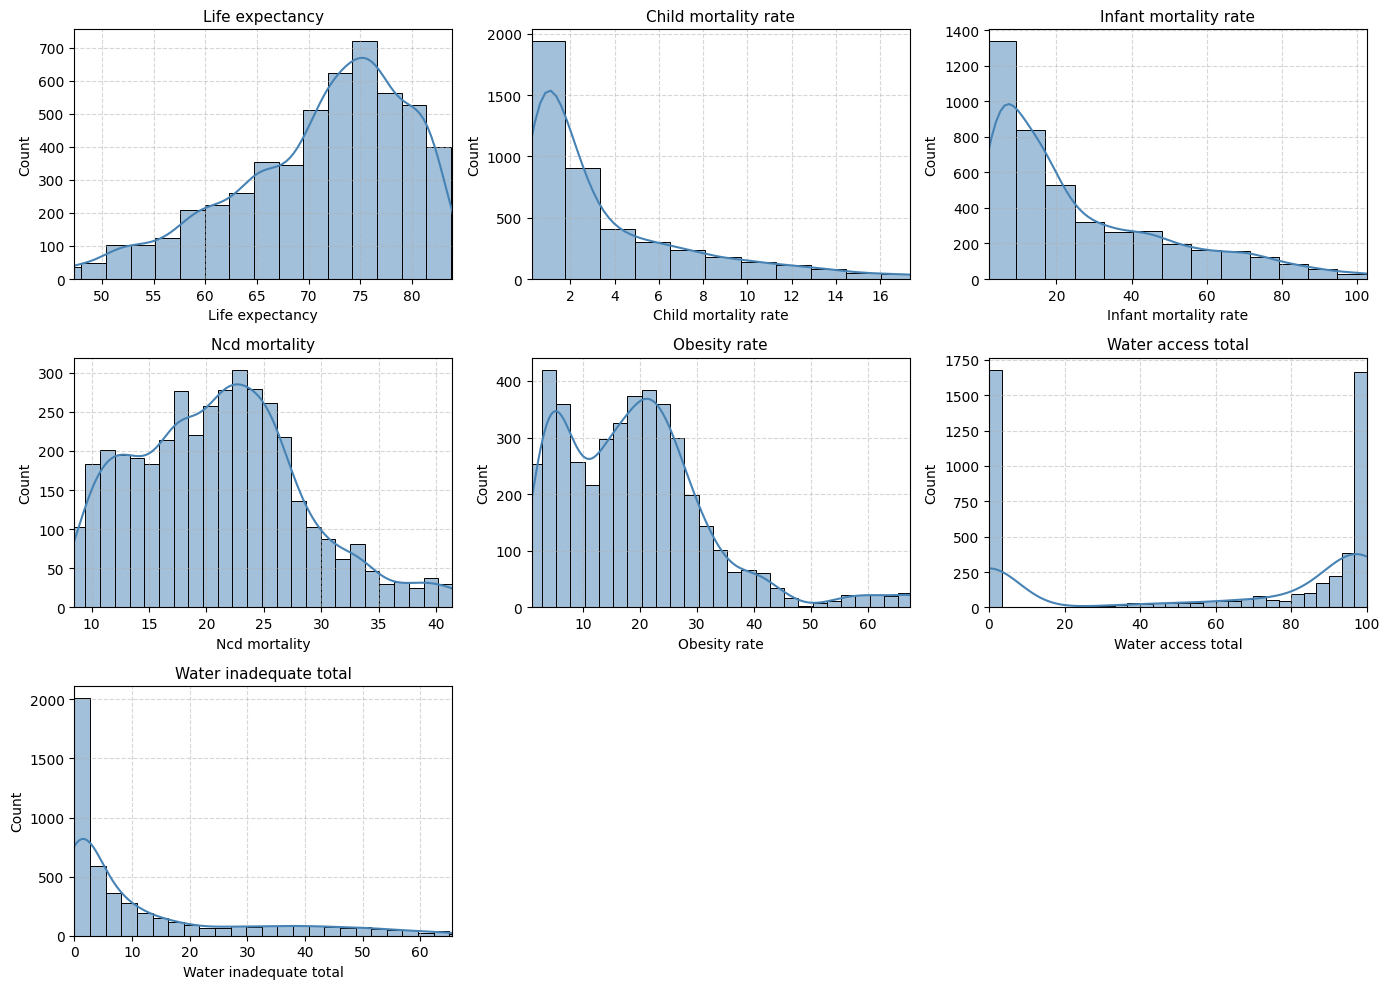

In [ ]:
numeric_cols = [
    'life_expectancy', 'child_mortality_rate', 'infant_mortality_rate',
    'ncd_mortality', 'obesity_rate', 'water_access_total', 'water_inadequate_total'
]

plt.figure(figsize=(14, 10))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, bins=30, color='steelblue', edgecolor='black')
    plt.title(col.replace("_", " ").capitalize(), fontsize=11)
    plt.xlabel(col.replace("_", " ").capitalize())
    plt.ylabel("Count")
    plt.grid(True, linestyle='--', alpha=0.5)
    
    # Adjust x-limits automatically based on 1st–99th percentile to reduce outlier distortion
    low, high = df[col].quantile([0.01, 0.99])
    plt.xlim(low, high)

plt.tight_layout()
plt.show()



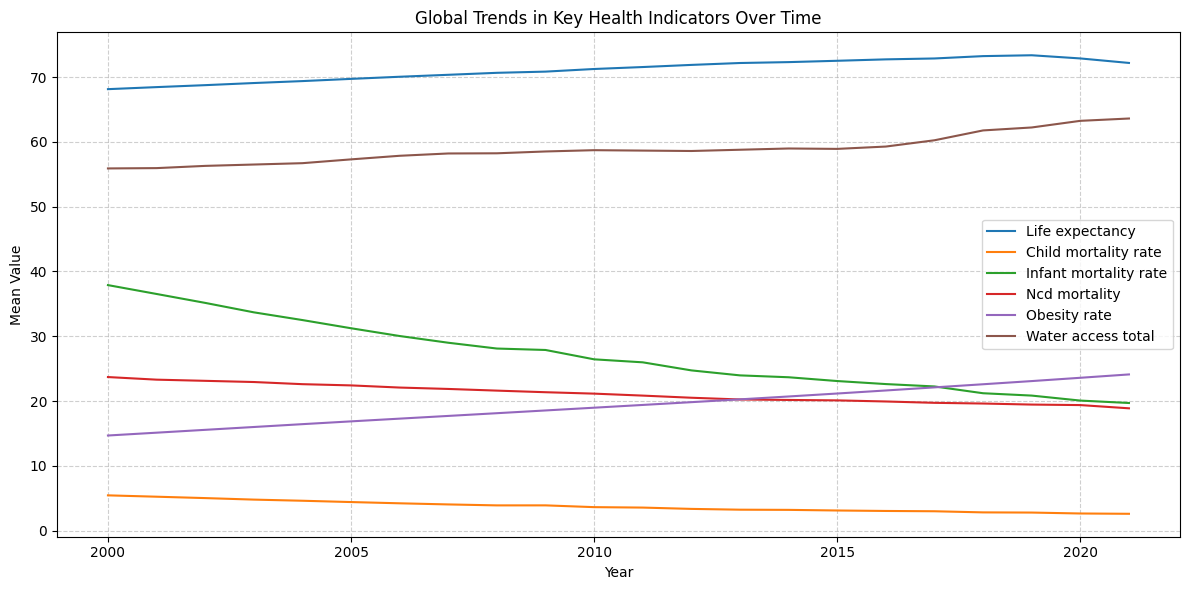

In [7]:
# calculate global yearly means
global_trends = df.groupby("year")[
    ['life_expectancy', 'child_mortality_rate', 'infant_mortality_rate',
     'ncd_mortality', 'obesity_rate', 'water_access_total']
].mean().reset_index()

# plot
plt.figure(figsize=(12, 6))
for col in global_trends.columns[1:]:
    plt.plot(global_trends['year'], global_trends[col], label=col.replace("_", " ").capitalize())

plt.title("Global Trends in Key Health Indicators Over Time")
plt.xlabel("Year")
plt.ylabel("Mean Value")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


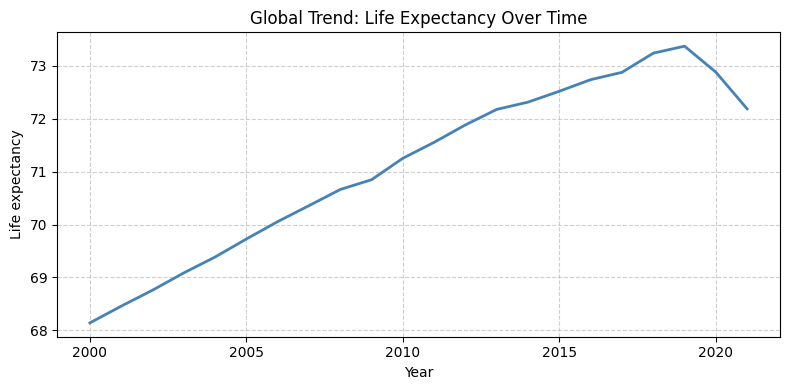

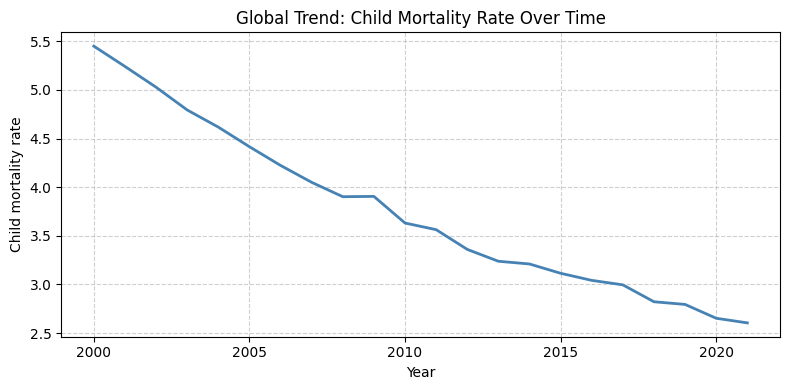

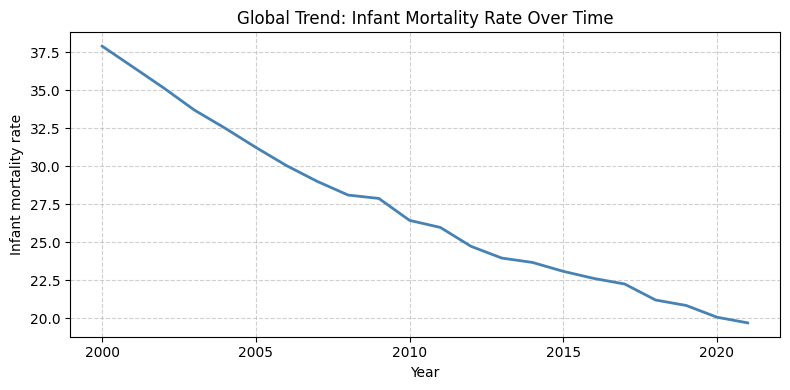

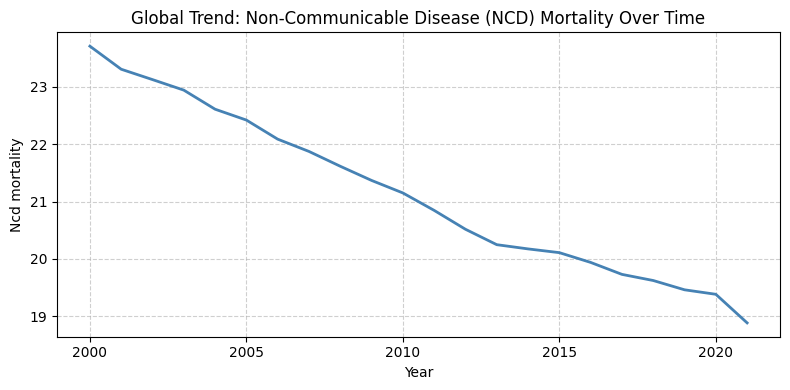

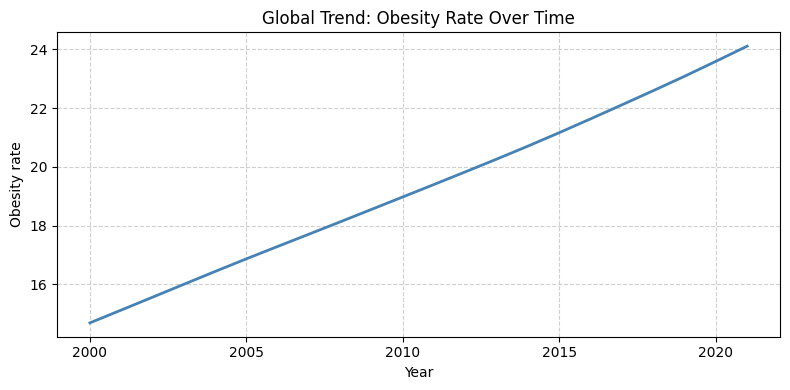

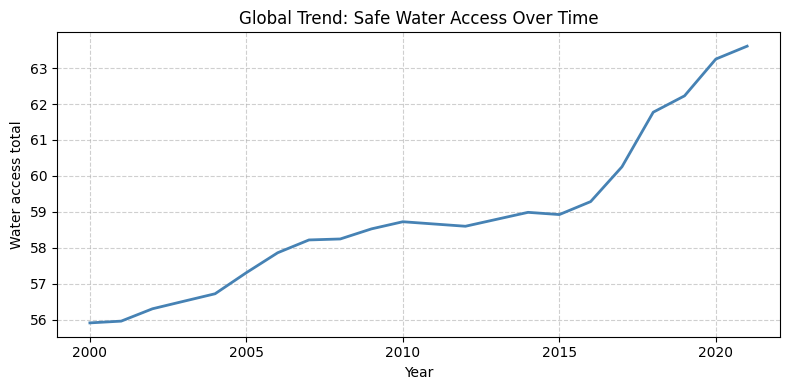

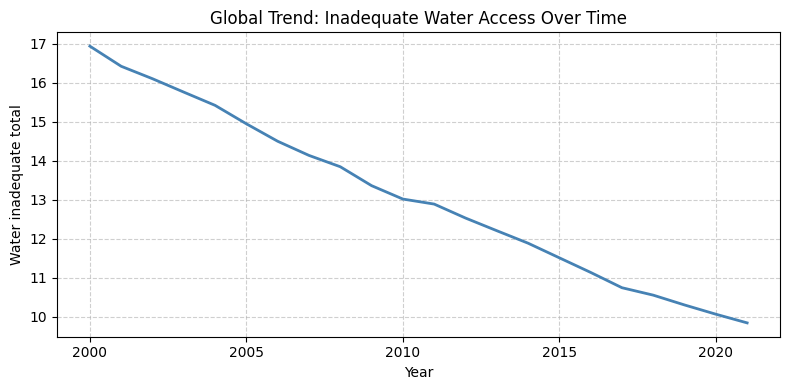

In [8]:
# calculate yearly mean for each variable
global_trends = df.groupby("year")[
    ['life_expectancy', 'child_mortality_rate', 'infant_mortality_rate',
     'ncd_mortality', 'obesity_rate', 'water_access_total', 'water_inadequate_total']
].mean().reset_index()

# list of variables and titles
indicators = {
    'life_expectancy': 'Global Trend: Life Expectancy Over Time',
    'child_mortality_rate': 'Global Trend: Child Mortality Rate Over Time',
    'infant_mortality_rate': 'Global Trend: Infant Mortality Rate Over Time',
    'ncd_mortality': 'Global Trend: Non-Communicable Disease (NCD) Mortality Over Time',
    'obesity_rate': 'Global Trend: Obesity Rate Over Time',
    'water_access_total': 'Global Trend: Safe Water Access Over Time',
    'water_inadequate_total': 'Global Trend: Inadequate Water Access Over Time'
}

# plot each indicator separately
for var, title in indicators.items():
    plt.figure(figsize=(8, 4))
    plt.plot(global_trends['year'], global_trends[var], color='steelblue', linewidth=2)
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel(var.replace('_', ' ').capitalize())
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


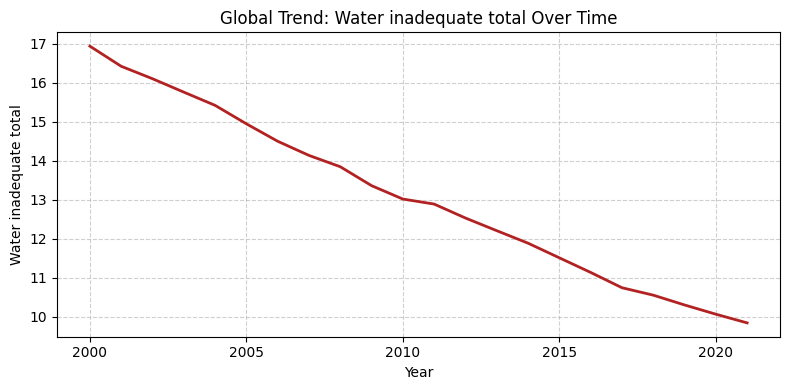

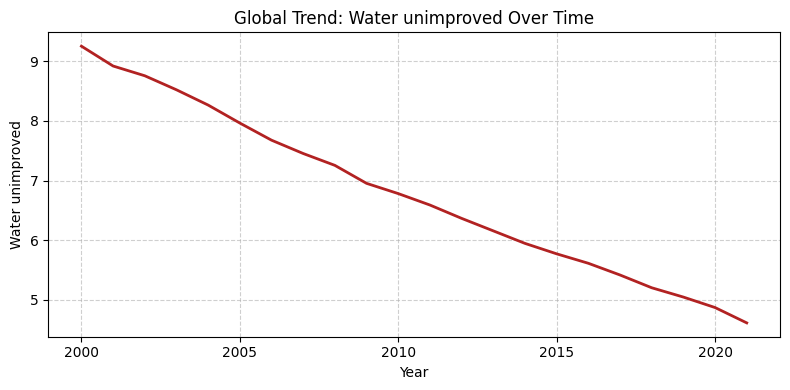

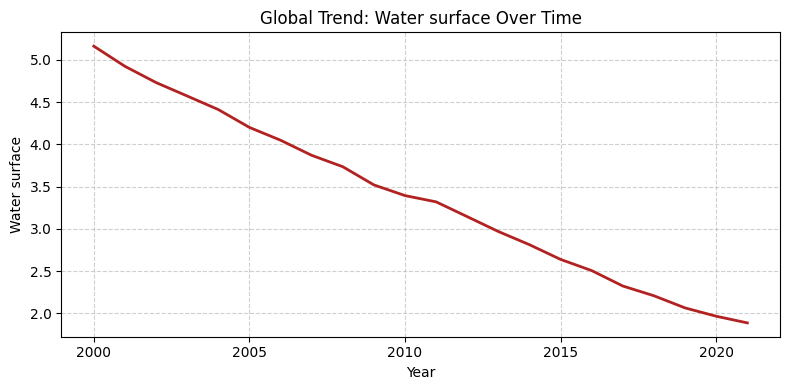

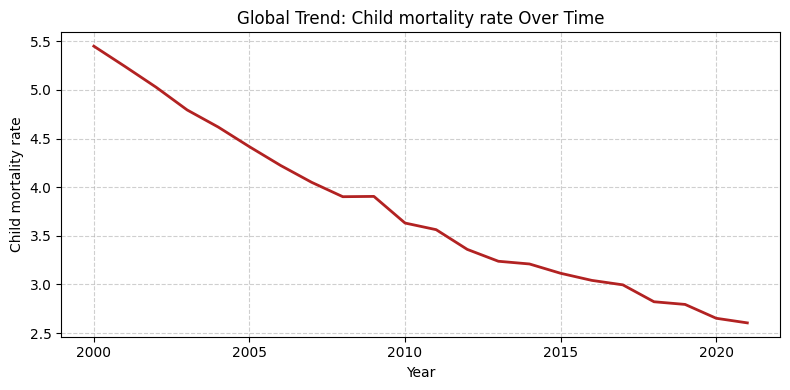

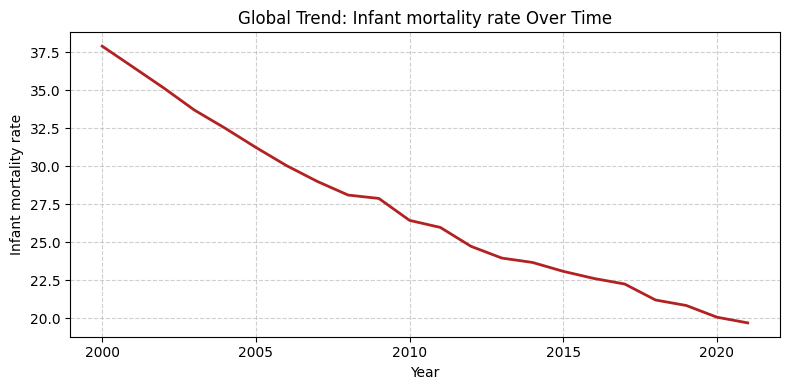

In [9]:
# compute global yearly averages for negative indicators
negative_trends = df.groupby('year')[
    ['water_inadequate_total', 'water_unimproved', 'water_surface',
     'child_mortality_rate', 'infant_mortality_rate']
].mean().reset_index()

# plot each indicator separately
for col in negative_trends.columns[1:]:
    plt.figure(figsize=(8, 4))
    plt.plot(negative_trends['year'], negative_trends[col], color='firebrick', linewidth=2)
    plt.title(f"Global Trend: {col.replace('_', ' ').capitalize()} Over Time")
    plt.xlabel('Year')
    plt.ylabel(col.replace('_', ' ').capitalize())
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


In [14]:
# set a modern aesthetic
sns.set_theme(style="whitegrid", font_scale=1.1)
plt.figure(figsize=(18, 12))

# define color palette
palette = {
    "Life expectancy": "#2E86AB",
    "Child mortality rate": "#E74C3C",
    "Obesity rate": "#F5B041",
    "Water access total": "#27AE60",
    "Water inadequate total": "#884EA0"
}

# compute yearly averages for key indicators
trend_df = df.groupby("year")[[
    "life_expectancy", "child_mortality_rate",
    "obesity_rate", "water_access_total", "water_inadequate_total"
]].mean().reset_index()


<Figure size 1800x1200 with 0 Axes>

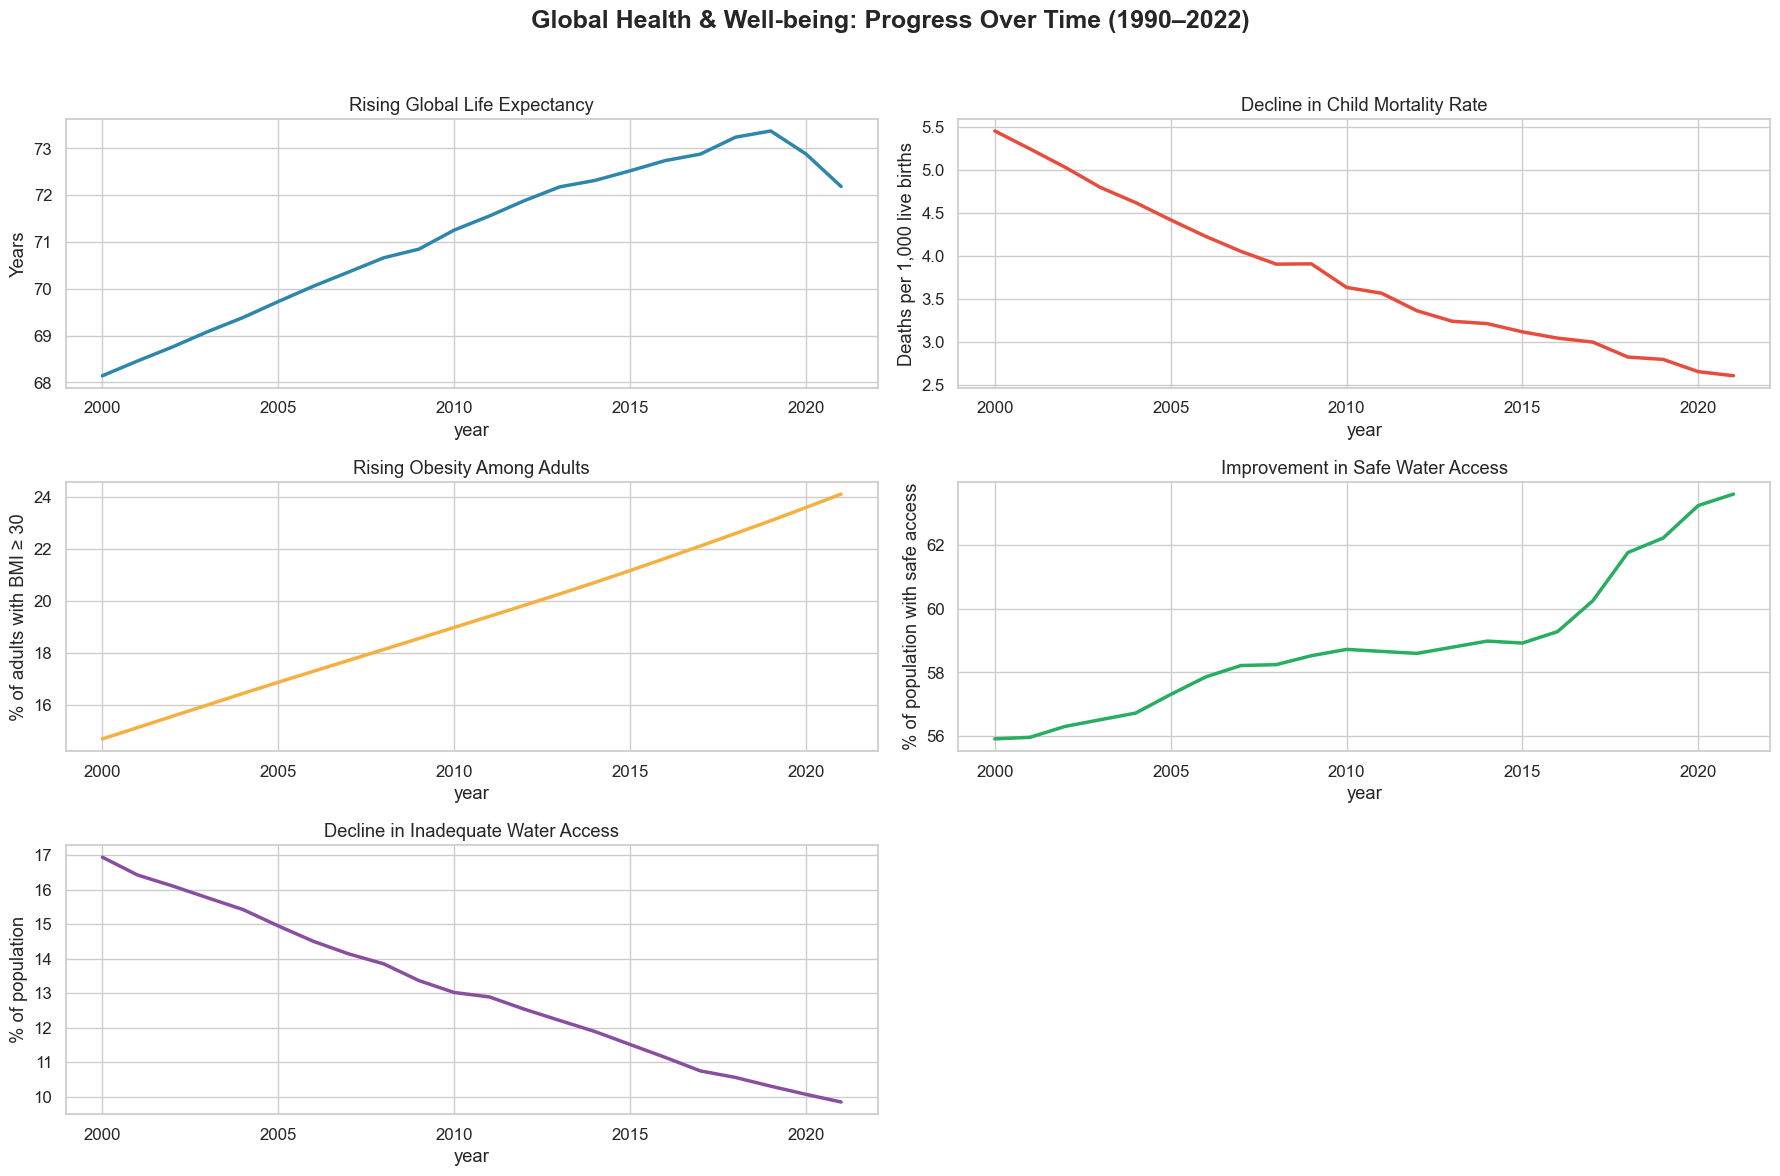

In [15]:
fig, axes = plt.subplots(3, 2, figsize=(18, 12))
fig.suptitle("Global Health & Well-being: Progress Over Time (1990–2022)", fontsize=18, fontweight="bold")

# Panel 1: Life Expectancy
sns.lineplot(ax=axes[0,0], data=trend_df, x="year", y="life_expectancy", color=palette["Life expectancy"], linewidth=2.5)
axes[0,0].set_title("Rising Global Life Expectancy")
axes[0,0].set_ylabel("Years")

# Panel 2: Child Mortality
sns.lineplot(ax=axes[0,1], data=trend_df, x="year", y="child_mortality_rate", color=palette["Child mortality rate"], linewidth=2.5)
axes[0,1].set_title("Decline in Child Mortality Rate")
axes[0,1].set_ylabel("Deaths per 1,000 live births")

# Panel 3: Obesity Rate
sns.lineplot(ax=axes[1,0], data=trend_df, x="year", y="obesity_rate", color=palette["Obesity rate"], linewidth=2.5)
axes[1,0].set_title("Rising Obesity Among Adults")
axes[1,0].set_ylabel("% of adults with BMI ≥ 30")

# Panel 4: Water Access
sns.lineplot(ax=axes[1,1], data=trend_df, x="year", y="water_access_total", color=palette["Water access total"], linewidth=2.5)
axes[1,1].set_title("Improvement in Safe Water Access")
axes[1,1].set_ylabel("% of population with safe access")

# Panel 5: Water Inadequate
sns.lineplot(ax=axes[2,0], data=trend_df, x="year", y="water_inadequate_total", color=palette["Water inadequate total"], linewidth=2.5)
axes[2,0].set_title("Decline in Inadequate Water Access")
axes[2,0].set_ylabel("% of population")

# empty placeholder (for aesthetic balance)
axes[2,1].axis("off")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [16]:
import plotly.express as px

# Select the latest available year for comparison
latest_year = df['year'].max()
map_df = df[df['year'] == latest_year]

fig = px.choropleth(
    map_df,
    locations="iso_code",                # 3-letter country code
    color="life_expectancy",             # metric to visualize
    hover_name="country",
    color_continuous_scale="Viridis",    # modern blue-green palette
    title=f"Global Life Expectancy in {latest_year}",
    projection="natural earth"
)

fig.update_layout(
    title_font_size=20,
    geo=dict(showframe=False, showcoastlines=True, projection_type='natural earth'),
    coloraxis_colorbar=dict(title="Years", ticksuffix=" yrs"),
    template="plotly_white"
)

fig.show()


In [53]:
import plotly.express as px

fig = px.choropleth(
    df,
    locations="iso_code",
    color="life_expectancy",
    hover_name="country",
    animation_frame="year",
    color_continuous_scale="Viridis",
    range_color=[40, 85],
    title="Global Life Expectancy Evolution (1950–2022)",
    projection="natural earth"
)
fig.show()


In [17]:
# Select the latest available year for comparison
latest_year = df['year'].max()
map_df = df[df['year'] == latest_year]

# Child mortality (inverse metric)
fig = px.choropleth(
    map_df,
    locations="iso_code",
    color="child_mortality_rate",
    hover_name="country",
    color_continuous_scale="Reds",
    title=f"Child Mortality Rate (% of live births) – {latest_year}",
    projection="natural earth"
)
fig.update_layout(template="plotly_white")
fig.show()



In [19]:
fig = px.choropleth(
    df,
    locations="iso_code",
    color="water_access_total",
    hover_name="country",
    animation_frame="year",
    color_continuous_scale="YlGnBu",
    title="Evolution of Safe Water Access (2000–2022)",
    projection="natural earth"
)
fig.update_layout(template="plotly_white")
fig.show()


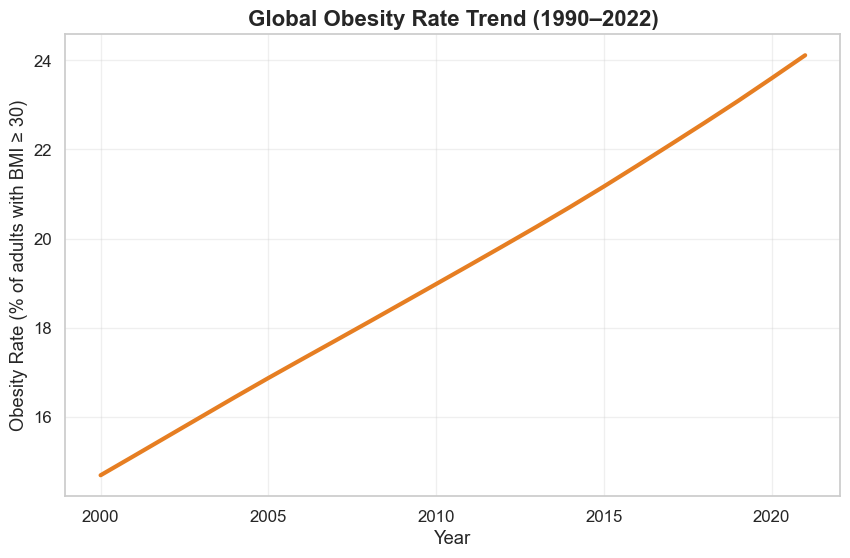

In [20]:
# prepare yearly average obesity
obesity_trend = df.groupby("year")["obesity_rate"].mean().reset_index()

# plot
plt.figure(figsize=(10,6))
sns.lineplot(data=obesity_trend, x="year", y="obesity_rate", linewidth=3, color="#E67E22")

plt.title("Global Obesity Rate Trend (1990–2022)", fontsize=16, weight="bold")
plt.xlabel("Year")
plt.ylabel("Obesity Rate (% of adults with BMI ≥ 30)")
plt.grid(alpha=0.3)
plt.show()


In [21]:
latest_year = df['year'].max()
map_df = df[df['year'] == latest_year]

fig = px.choropleth(
    map_df,
    locations="iso_code",
    color="obesity_rate",
    hover_name="country",
    color_continuous_scale="OrRd",  # orange-red palette
    title=f"Global Obesity Rate by Country – {latest_year}",
    projection="natural earth"
)

fig.update_layout(
    title_font_size=20,
    geo=dict(showframe=False, showcoastlines=True, projection_type='natural earth'),
    coloraxis_colorbar=dict(title="% of adults"),
    template="plotly_white"
)

fig.show()


In [22]:
fig = px.choropleth(
    df,
    locations="iso_code",
    color="obesity_rate",
    hover_name="country",
    animation_frame="year",
    color_continuous_scale="OrRd",
    range_color=[0, 50],  # cap at 50% for visual clarity
    title="Evolution of Global Obesity (1990–2022)",
    projection="natural earth"
)
fig.update_layout(template="plotly_white")
fig.show()


In [37]:
# Ensure the column is numeric
df['water_access_total'] = pd.to_numeric(df['water_access_total'], errors='coerce')

# Replace NaN or zero values with a small number (so every bubble has a size)
df['water_access_total'] = df['water_access_total'].fillna(5)
df.loc[df['water_access_total'] <= 0, 'water_access_total'] = 5


In [39]:
fig = px.scatter(
    df,
    x="obesity_rate",
    y="life_expectancy",
    size="water_access_total",
    color="region",
    hover_name="country",
    animation_frame="year",
    range_x=[0, 70],
    range_y=[40, 90],
    title="Obesity vs Life Expectancy Over Time (1990–2022)"
)
fig.show()
